In [4]:
%pip install pandas
%pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas
import xlrd
import matplotlib.pyplot as plt

# Task 1: Data Loading and Exploration

In [45]:
data = pandas.read_excel("/Users/borisgans/Downloads/titanic3.xls")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [40]:

print(data.describe())
print(f"\nColumns: {data.columns}")

print(f"\nData types:\n {data.dtypes}")

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  

Columns: Index(['pclass', 'survived

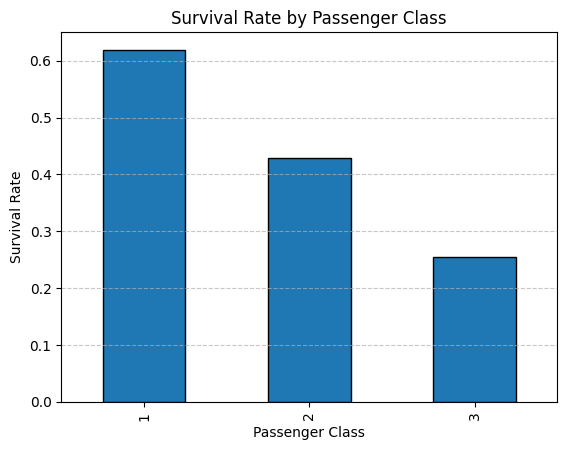

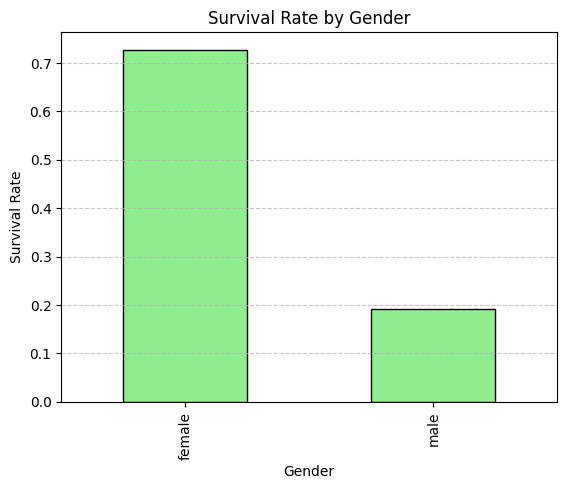

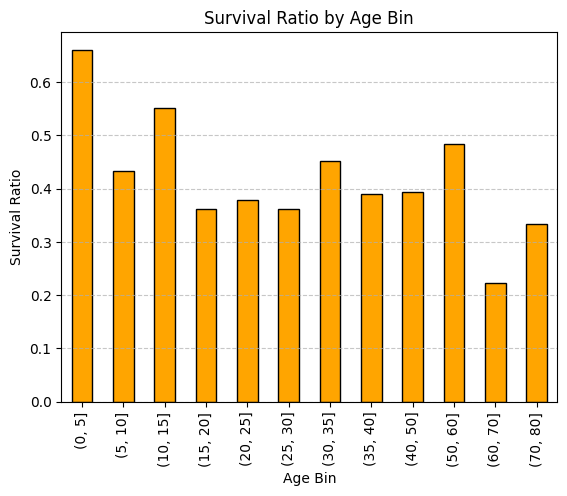

In [41]:
#Survival rate vs passenger class
survival_by_class = data.groupby('pclass')['survived'].mean()
survival_by_class.plot(kind='bar', edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Survival rate vs gender
survival_by_sex = data.groupby('sex')['survived'].mean()
survival_by_sex.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Survival rate vs age
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
data['age_bin'] = pandas.cut(data['age'], bins=age_bins)

survival_by_age_bin = data.groupby('age_bin')['survived'].mean()
survival_by_age_bin.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Survival Ratio by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Survival Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task 2: Managing Missing Values

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_bin    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 145.1+ KB


Data.info() shows the count of non-null entries per column. Here we can see that:
>- Age is missing 263 values
>- Fare is missing 1 value
>- Cabin is missing 1014 values
>- Embarked is missing two values
>- Boat is missing 823 values
>- Body is missing 1188 values
>- Home Destination is missing 564 values

### Age Column

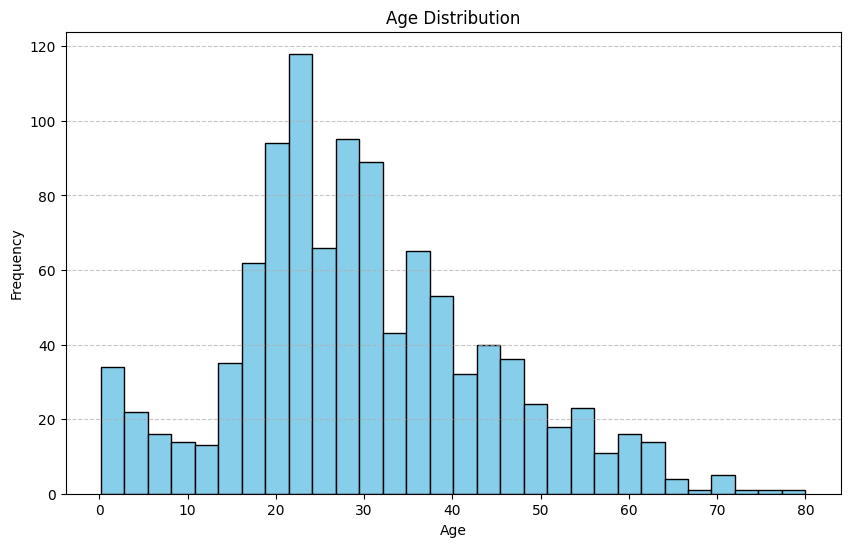

In [33]:
#Dealing with age column
plt.figure(figsize=(10, 6))
plt.hist(data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can see above, age is skewed to the right. Because of this, and considering it's numerical and probably has high predictive power (as shown above in the "Surival Ratio by Age Bin" plot) I believe I should impute the median rather than the mean into the missing values.

In [47]:
imputed_data = data.copy()

age_median = imputed_data['age'].median()
imputed_data['age'].fillna(age_median, inplace=True)

### Fare Column